# Multiple Variable Linear Regression

### 1. Vectorization
- To implement Multi Linear Regression, we use vectorization technique which makes the code shorter and faster.
- In vectorization technique, we can represent all features with a single vector quantity instead of denoting each feature with a single variable.
- Thus, appearently,  it looks like a single variable function but under the hood, all features are processed easily with fast and shorter code. 

In [1]:
# In pyhton, we use Numpy Library to create vectors and performing different Vectors' operations.
import numpy as np

#### i) Numpy Vector Operations

In [2]:
a = np.zeros((4,))
print(f"a: {a}; \nshape: {a.shape}, dtype: {a.dtype}; dimension: {a.ndim}")

a = np.zeros((4,5), dtype=int)
a = np.zeros((4,5), dtype='int64')
print(f"a: {a}; \nshape: {a.shape}, dtype: {a.dtype}; dimension: {a.ndim}")


a: [0. 0. 0. 0.]; 
shape: (4,), dtype: float64; dimension: 1
a: [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]; 
shape: (4, 5), dtype: int64; dimension: 2


In [3]:
# Numpy Operations
# create 2 vectors

a = np.arange(4)
a = a.reshape((2,-1)) # -1 means set the shape of 2nd dmesntion as per feasibilty.
print(f"a: {a}; \nshape: {a.shape}, dtype: {a.dtype}; dimension: {a.ndim}")

b = np.ones((2,2))
print(f"b: {b}; \nshape: {b.shape}, dtype: {b.dtype}; dimension: {b.ndim}")

print("\n***** Element-wise Operations *****")

print(f"Addition a+b: {a+b}")
b = b*2  # Multiplied vector b with sacalar (2)
print(f"\nScalar Multiplication b*2: {b}; \nshape: {b.shape}, dtype: {b.dtype}; dimension: {b.ndim}")

b[0][0] = 3; b[1][0] = 4
print(f"new_b: {b}")
c = a*b
print(f"Multiplication c = a*b: {c}")

print(f"\nSlicing c[:,0]: {c[:,0]}")


a: [[0 1]
 [2 3]]; 
shape: (2, 2), dtype: int32; dimension: 2
b: [[1. 1.]
 [1. 1.]]; 
shape: (2, 2), dtype: float64; dimension: 2

***** Element-wise Operations *****
Addition a+b: [[1. 2.]
 [3. 4.]]

Scalar Multiplication b*2: [[2. 2.]
 [2. 2.]]; 
shape: (2, 2), dtype: float64; dimension: 2
new_b: [[3. 2.]
 [4. 2.]]
Multiplication c = a*b: [[0. 2.]
 [8. 6.]]

Slicing c[:,0]: [0. 8.]


In [4]:
# Dot Product (2D)
c = np.dot(a,b)
print(f"Dot Product c = a.b: {c}; \nshape: {c.shape}, dtype: {c.dtype}; dimension: {c.ndim}")

Dot Product c = a.b: [[ 4.  2.]
 [18. 10.]]; 
shape: (2, 2), dtype: float64; dimension: 2


#### ii) Dot Product using Custom Function

Let's implement our own version of the dot product:

**Using a for loop**, implement a function which returns the dot product of two vectors. The function to return given inputs $a$ and $b$:
$$ x = \sum_{i=0}^{n-1} a_i b_i $$
Assume both `a` and `b` are the same shape.

In [5]:
def my_dot_product(a,b):
    dot_procut = np.array(0)
    for i in range(len(a)):
        dot_procut += a[i]*b[i]
    return dot_procut


In [6]:
# test 1-D
a2 = np.array([1, 2, 3, 4])
b2 = np.array([-1, 4, 3, 2])
print(f"a:{a2} \nb:{b2}")
c = my_dot_product(a2, b2)
print(f"NumPy 1-D c = a.b = {c}, c.shape = {c.shape} ") 

a:[1 2 3 4] 
b:[-1  4  3  2]
NumPy 1-D c = a.b = 24, c.shape = () 


#### iii) Dot Product using Numpy np.dot() Function

In [7]:
a2 = np.array([1, 2, 3, 4])
b2 = np.array([-1, 4, 3, 2])
print(f"a:{a2} \nb:{b2}")
c = np.dot(a2, b2)
print(f"NumPy 1-D np.dot(a, b) = {c}, np.dot(a, b).shape = {c.shape} ") 
c = np.dot(b2, a2)
print(f"NumPy 1-D np.dot(b, a) = {c}, np.dot(a, b).shape = {c.shape}, dtype: {c.dtype}; dimension: {c.ndim}")

a:[1 2 3 4] 
b:[-1  4  3  2]
NumPy 1-D np.dot(a, b) = 24, np.dot(a, b).shape = () 
NumPy 1-D np.dot(b, a) = 24, np.dot(a, b).shape = (), dtype: int32; dimension: 0


### 2. Multiple Variable Linear Regression

<a name="toc_15456_1.1"></a>
#### i) Goals

- Extend our regression model  routines to support multiple features
    - Extend data structures to support multiple features
    - Rewrite prediction, cost and gradient routines to support multiple features
    - Utilize NumPy `np.dot` to vectorize their implementations for speed and simplicity

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt

#### ii) Notations
Here is a summary of some of the notations you will encounter, updated for multiple features.  

|General <img width=70/> <br />  Notation  <img width=60/> | Description<img width=200/>| Python (if applicable) |
|: ------------|: ------------------------------------------------------------||
| $a$ | scalar, non bold                                                      ||
| $\mathbf{a}$ | vector, bold                                                 ||
| $\mathbf{A}$ | matrix, bold capital                                         ||
| **Regression** |         |    |     |
|  $\mathbf{X}$ | training example matrix                  | `X_train` |   
|  $\mathbf{y}$  | training example  targets                | `y_train` 
|  $\mathbf{x}^{(i)}$, $y^{(i)}$ | $i_{th}$Training Example | `X[i]`, `y[i]`|
| m | number of training examples | `m`|
| n | number of features in each example | `n`|
|  $\mathbf{w}$  |  parameter: weight,                       | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ | The result of the model evaluation at $\mathbf{x^{(i)}}$ parameterized by $\mathbf{w},b$: $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)}+b$  | `f_wb` | 


<a name="toc_15456_2"></a>
#### iii) Problem Statement

You will use the motivating example of housing price prediction. The training dataset contains three examples with four features (size, bedrooms, floors and, age) shown in the table below.  Note that, unlike the earlier labs, size is in sqft rather than 1000 sqft. This causes an issue, which you will solve in the next lab!

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

You will build a linear regression model using these values so you can then predict the price for other houses. For example, a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old.  

Please run the following code cell to create your `X_train` and `y_train` variables.

In [9]:
x_train = np.array([
    [2104, 5, 1, 45],
    [1416, 3, 2, 40],
    [852, 2, 1, 35]
])

# OR Declare x_train as:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

print(f"x_train: {x_train}; \nshape: {x_train.shape}, dtype: {x_train.dtype}; dimension: {x_train.ndim}")
print(f"y_train: {y_train}; \nshape: {y_train.shape}, dtype: {y_train.dtype}; dimension: {y_train.ndim}")


x_train: [[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]; 
shape: (3, 4), dtype: int32; dimension: 2
y_train: [460 232 178]; 
shape: (3,), dtype: int32; dimension: 1


<a name="toc_15456_2.2"></a>
#### iv) Parameter vector w, b

* $\mathbf{w}$ is a vector with $n$ elements.
  - Each element contains the parameter associated with one feature.
  - in our dataset, n is 4.
  - notionally, we draw this as a column vector

$$\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$
* $b$ is a scalar parameter.  


For demonstration, $\mathbf{w}$ and $b$ will be loaded with some initial selected values that are near the optimal. $\mathbf{w}$ is a 1-D NumPy vector.

In [10]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


#### v) Non-Vectorized Implementation of f(x) having Multiple Variable

In [22]:
# Predict Element by Element
def predict_elem_by_elem(w, x, b):
    """
    single predict using linear regression
    
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters    
      b (scalar):  model parameter     
      
    Returns:
      f_wb (scalar):  Model prediction
    """
    f_wb = 0
    for i in range(x.shape[0]):
        f_wb += w[i] * x[i] # Weighted Sum >> w1*x1 + w2*x2 + ...
    f_wb = f_wb + b
    return f_wb




In [23]:
x_vec = x_train[0,:]
print(f"x_vec: {x_vec}, shape: {x_vec.shape}, type: {type(x_vec)}")
print(f"w_init: {w_init}, shape: {w_init.shape}, type: {type(w_init)}")
print(f"b_init: {b_init}, type: {type(b_init)}")

x_vec: [2104    5    1   45], shape: (4,), type: <class 'numpy.ndarray'>
w_init: [  0.39133535  18.75376741 -53.36032453 -26.42131618], shape: (4,), type: <class 'numpy.ndarray'>
b_init: 785.1811367994083, type: <class 'float'>


In [26]:
f_wb = predict_elem_by_elem(w_init, x_vec, b_init)
print("w_init:{}, \nx_vec:{}, \nb_init:{} >> f_wb:{}".format(w_init, x_vec, b_init, f_wb))

w_init:[  0.39133535  18.75376741 -53.36032453 -26.42131618], 
x_vec:[2104    5    1   45], 
b_init:785.1811367994083 >> f_wb:459.9999976194083


#### vi) Vectorized Implementation of f(x) having Multiple Variable

In [27]:
def predict(w, x, b):
    f_wb = np.dot(w,x) + b
    return f_wb

In [28]:
f_wb = predict(w_init, x_vec, b_init)
print("w_init:{}, \nx_vec:{}, \nb_init:{} >> f_wb:{}".format(w_init, x_vec, b_init, f_wb))

w_init:[  0.39133535  18.75376741 -53.36032453 -26.42131618], 
x_vec:[2104    5    1   45], 
b_init:785.1811367994083 >> f_wb:459.9999976194083


<a name="toc_15456_4"></a>
#### vii) Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

Below is an implementation of equations (3) and (4). Note that this uses a *standard pattern for this course* where a for loop over all `m` examples is used.

In [33]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        # f_wb = predict(w,x[i],b)
        f_wb = np.dot(w,x[i]) + b
        cost += (f_wb - y[i])**2
    mse = cost/(2*m)
    return mse

In [34]:
cost = compute_cost(x_train, y_train, w_init, b_init)
print(cost)

1.5578904428966628e-12


<a name="toc_15456_5"></a>
# 3 Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


#### i) Compute Gradient with Multiple Variables (Features)

In [41]:
# compute_gradient for multiple variables/features/predictors
def compute_gradient(x, y, w, b):

    m, n = x.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0

    for i in range(m):
        f_wb = np.dot(w, x[i]) + b
        dj_db += f_wb - y[i]
        for j in range(n):
            dj_dw[j] += (f_wb - y[i]) * x[i,j] # See Eq. (6) dj_dw[j] >> x[i, j]
    
    dj_db = dj_db / m
    dj_dw = dj_dw / m

    return dj_dw, dj_db

In [42]:
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -1.6739251501955248e-06
dj_dw at initial w,b: 
 [-2.72623577e-03 -6.27197263e-06 -2.21745578e-06 -6.92403391e-05]


#### ii) Compute Gradient Descent With Multiple Variables (Features)

In [56]:
def gradient_descent(x, y, w, b, lr, iterations):
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      lr (float)          : alpha - Learning rate
      iterations (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
    """
    steps = iterations // 10
    j_history, p_history = [], []

    for i in range(iterations):
        cost = compute_cost(x,y,w,b)
        j_history.append(cost)
        p_history.append([w,b])

        dj_dw, dj_db = compute_gradient(x,y,w,b)
        temp_w = w - lr * dj_dw
        temp_b = b - lr * dj_db
        w, b = temp_w, temp_b
        # print(i, end=",")
        if (i % steps) == 0:
            print(f"iteration: {i}, cost: {cost}, w:{w}, b:{b}")
    return w, b, j_history #return final w,b and J history for graphing

In [57]:
print(f"x_train: {x_train}; \nshape: {x_train.shape}, dtype: {x_train.dtype}; dimension: {x_train.ndim}")
print(f"y_train: {y_train}; \nshape: {y_train.shape}, dtype: {y_train.dtype}; dimension: {y_train.ndim}")
print("w_init:{}, \nb_init:{}".format(w_init, b_init))

w_init = np.zeros_like(w_init)
b_init = 0.
print("w_init:{}, \nb_init:{}".format(w_init, b_init))

x_train: [[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]; 
shape: (3, 4), dtype: int32; dimension: 2
y_train: [460 232 178]; 
shape: (3,), dtype: int32; dimension: 1
w_init:[0. 0. 0. 0.], 
b_init:0.0
w_init:[0. 0. 0. 0.], 
b_init:0.0


In [63]:
iterations = 1000
# learning_rate = 0.001
learning_rate = 5.0e-7

# run gradient descent 
w_final, b_final, J_hist = gradient_descent(x_train, y_train, w_init, b_init, learning_rate, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

iteration: 0, cost: 49518.0, w:[2.41334667e-01 5.58666667e-04 1.83666667e-04 6.03500000e-03], b:0.000145
iteration: 100, cost: 696.0010595124644, w:[ 0.20235171  0.00079796 -0.00099658 -0.00219736], b:-0.0001198596187768893
iteration: 200, cost: 694.9313476914762, w:[ 0.20253446  0.00112715 -0.00214349 -0.00940619], b:-0.00035965781839536286
iteration: 300, cost: 693.8709864577195, w:[ 0.2027164   0.00145611 -0.00328876 -0.01658286], b:-0.0005983240279392168
iteration: 400, cost: 692.8198930237817, w:[ 0.20289753  0.00178484 -0.00443238 -0.02372751], b:-0.0008358632706869382
iteration: 500, cost: 691.7779853352548, w:[ 0.20307785  0.00211335 -0.00557437 -0.03084027], b:-0.0010722805476294612
iteration: 600, cost: 690.7451820642369, w:[ 0.20325736  0.00244162 -0.00671473 -0.0379213 ], b:-0.0013075808375690545
iteration: 700, cost: 689.7214026029069, w:[ 0.20343608  0.00276967 -0.00785347 -0.04497072], b:-0.0015417690972177696
iteration: 800, cost: 688.706567057147, w:[ 0.20361399  0.003

In [64]:
m,_ = x_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


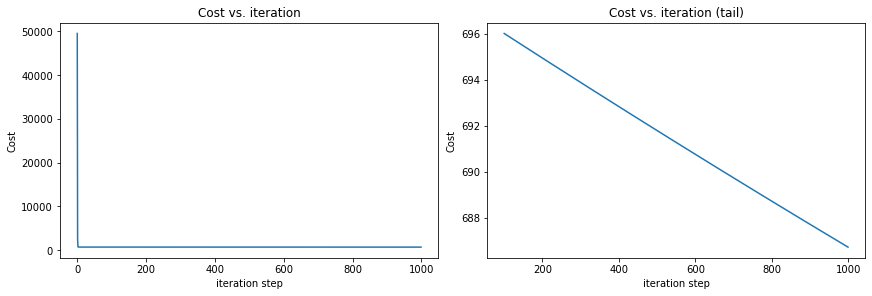

In [65]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

#### [Go to Home](../)